<a href="https://colab.research.google.com/github/pranavi2013/AIML_2024/blob/main/Diabetic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("kandij/diabetes-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/diabetes-dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [11]:
path = "/kaggle/input/diabetes-dataset/diabetes2.csv"
df = pd.read_csv(path)

In [12]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Model Accuracy: 71.43 %

Confusion Matrix:
 [[82 18]
 [26 28]]


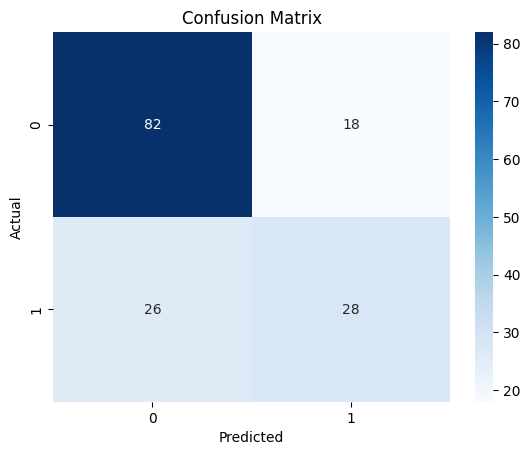

In [16]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Enter patient details:
Enter Pregnancies: 5
Enter Glucose: 116
Enter BloodPressure: 74
Enter SkinThickness: 0
Enter Insulin: 0
Enter BMI: 25.6
Enter DiabetesPedigreeFunction: 0.201
Enter Age: 30


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Prediction for Entered Patient:
The model predicts: Not Diabetic

Model Accuracy on Test Data: 71.43 %

Confusion Matrix on Test Data:
[[82 18]
 [26 28]]


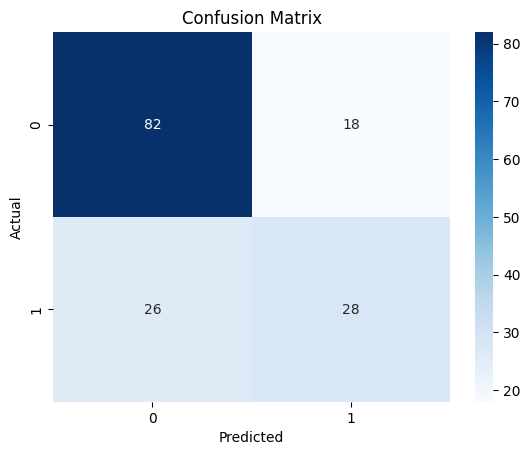

In [17]:
print("\nEnter patient details:")
columns = df.columns[:-1]
user_data = []
for col in columns:
    val = float(input(f"Enter {col}: "))
    user_data.append(val)

user_data_scaled = scaler.transform([user_data])
user_pred = model.predict(user_data_scaled)

print("\nPrediction for Entered Patient:")
if user_pred[0] == 1:
    print("The model predicts: Diabetic")
else:
    print("The model predicts: Not Diabetic")

# Show accuracy and confusion matrix again
print("\nModel Accuracy on Test Data:", round(accuracy * 100, 2), "%")

print("\nConfusion Matrix on Test Data:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
